# strength surface

template script to generate strength surface of various type
and plot 2d and 3d strength surface from data (and save contours)

Saved to: ../data/strength//ss_pmma_DRUCKER_props[3.08, 9.24]_srange[-100, 100, 201].npy


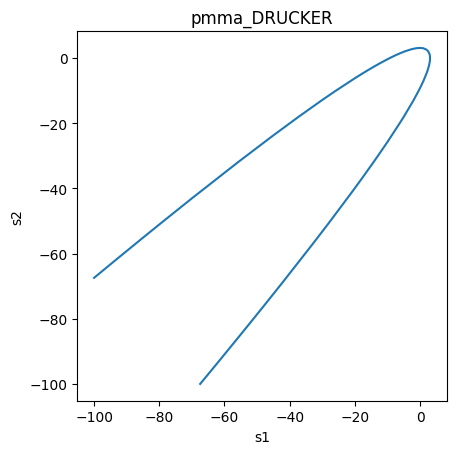

In [6]:
import os
import glob
from cm_vis.strength.gen import StrengthSurface

## clear data first
files = glob.glob("../data/strength/*")
for f in files:
    os.remove(f)

mname = "pmma"
stype = "DRUCKER"
sigma_ts = 3.08
sigma_cs = 9.24
props = [sigma_ts, sigma_cs]
srange = [-100, 100, 201]
data_dir = "../data/strength/"

surface = StrengthSurface(mname, stype, props, srange)
surface.gen(data_dir=data_dir)

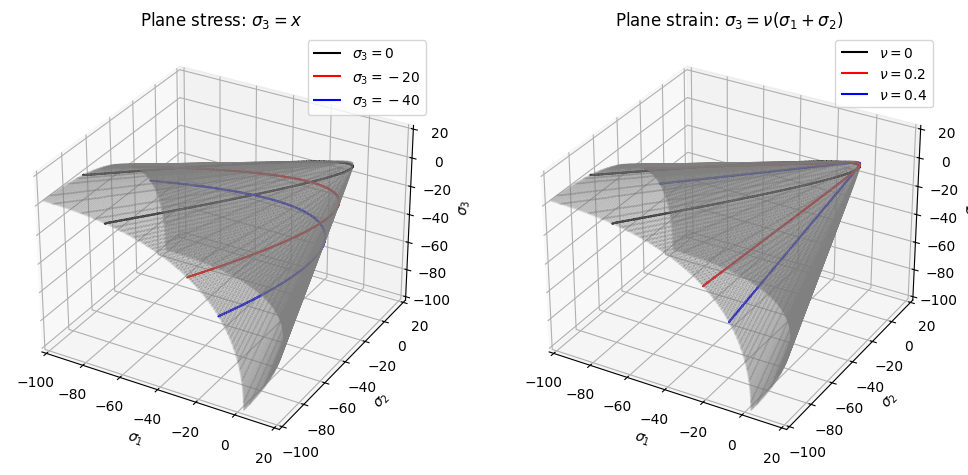

In [3]:
# 3D iso surface
import glob
import matplotlib.pyplot as plt
import s3dlib.surface as s3d
from cm_vis.strength.plot import SurfacePlotter

data_dir = "../data/strength/"
ss = glob.glob(data_dir + "*drucker*.npy")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={"projection": "3d"})

minmax = [-100, 20]

# ax1
plotter1 = SurfacePlotter(ss[0])
surf1 = plotter1.get_surf(alpha=0.1, color="grey")
c0 = surf1.contourLines(-0.001, coor="p", direction=[0, 0, 1], color="k", name="$\\sigma_3 = 0$")
c1 = surf1.contourLines(-20.001, coor="p", direction=[0, 0, 1], color="r", name="$\\sigma_3 = -20$")
c2 = surf1.contourLines(-40.001, coor="p", direction=[0, 0, 1], color="b", name="$\\sigma_3 = -40$")
ax1.add_collection3d(surf1)
ax1.add_collection3d(c0)
ax1.add_collection3d(c1)
ax1.add_collection3d(c2)
ax1.set(
    xlim=minmax, ylim=minmax, zlim=minmax, title="Plane stress: $\\sigma_3 = x$", xlabel="$\\sigma_1$", ylabel="$\\sigma_2$", zlabel="$\\sigma_3$"
)
ax1.legend()

# ax2
plotter2 = SurfacePlotter(ss[0])
surf2 = plotter2.get_surf(alpha=0.1, color="grey")
c0 = surf2.contourLines(-0.001, coor="p", direction=[0, 0, 1], color="k", name="$\\nu=0$")
c1 = surf2.contourLines(-0.001, coor="p", direction=[-0.2, -0.2, 1], color="r", name="$\\nu=0.2$")
c2 = surf2.contourLines(-0.001, coor="p", direction=[-0.4, -0.4, 1], color="b", name="$\\nu=0.4$")
ax2.add_collection3d(surf2)
ax2.add_collection3d(c0)
ax2.add_collection3d(c1)
ax2.add_collection3d(c2)
ax2.set(
    xlim=minmax,
    ylim=minmax,
    zlim=minmax,
    title="Plane strain: $\\sigma_3=\\nu (\\sigma_1+ \\sigma_2)$",
    xlabel="$\\sigma_1$",
    ylabel="$\\sigma_2$",
    zlabel="$\\sigma_3$",
)
ax2.legend()

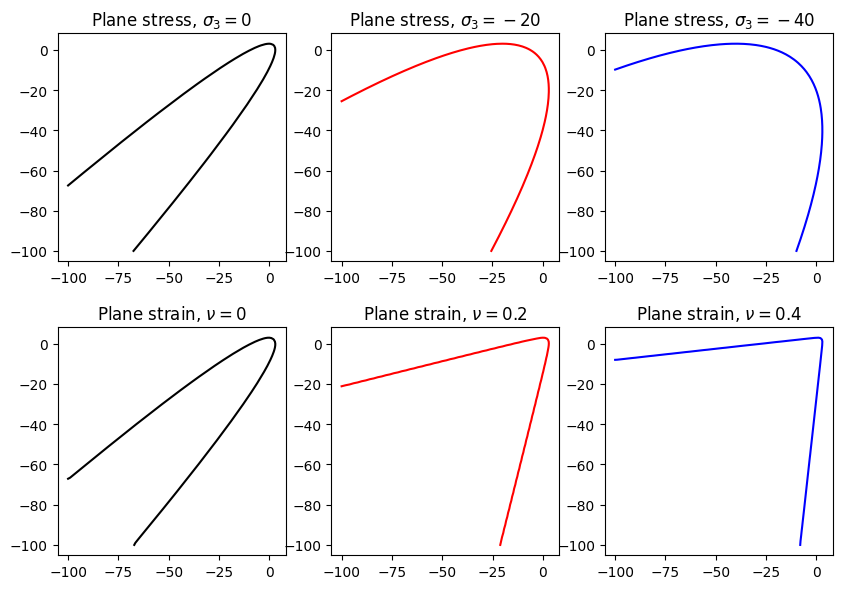

In [2]:
# 2D plane stress, and 2D plane strain
import glob
import matplotlib.pyplot as plt
from cm_vis.strength.plot import SurfacePlotter

data_dir = "../data/strength/"
ss = glob.glob(data_dir + "*drucker*.npy")

# plane stress vs. plane strain
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
# plt.style.use("elsevier")
plotter = SurfacePlotter(ss[0])

c = ["k", "r", "b"]
s3 = [0, -20, -40]
for i in range(3):
    plotter.plot(option="plane_stress", s3=s3[i], ax=axs[0][i], color=c[i])
    axs[0][i].set_title(f"Plane stress, $\\sigma_3={s3[i]}$")

nu = [0, 0.2, 0.4]
for i in range(3):
    plotter.plot(option="plane_strain", nu=nu[i], ax=axs[1][i], color=c[i])
    axs[1][i].set_title(f"Plane strain, $\\nu={nu[i]}$")

for ax in axs.flatten():
    ax.set(aspect="equal")